In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision.models import resnet18
import os

In [2]:
dataset_dir = "../dataset_output/google_asl/imgs/"

In [3]:
# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [4]:
# Load dataset
dataset = datasets.ImageFolder(root=dataset_dir, transform=transform)

In [5]:
# Split dataset into train and test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [6]:
batch_size = 32*3
batch_size

96

In [7]:
# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
# Load pre-trained ResNet18 model
resnet = resnet18(pretrained=True)

/home/dudu/anaconda3/envs/tf/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dudu/anaconda3/envs/tf/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
num_ftrs = resnet.fc.in_features

In [10]:
num_features = len(os.listdir(dataset_dir))

In [11]:
# Modify the fully connected layer to match the number of classes
resnet.fc = nn.Linear(num_ftrs, num_features)

In [12]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=10e-4)

In [13]:
# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
from datetime import datetime

In [15]:
for epoch in range(50):
    resnet.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    
    resnet.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    
    print(f"Epoch {epoch+1}/{10}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}")
    print(str(datetime.now()))
    print("="*10)

Epoch 1/10, Loss: 4.6324, Accuracy: 0.1907
2024-03-15 20:49:28.568292
Epoch 2/10, Loss: 3.0534, Accuracy: 0.3044
2024-03-15 20:55:22.617669
Epoch 3/10, Loss: 2.5797, Accuracy: 0.2786
2024-03-15 21:01:08.162866
Epoch 4/10, Loss: 2.2900, Accuracy: 0.4032
2024-03-15 21:06:56.829164
Epoch 5/10, Loss: 2.0609, Accuracy: 0.4410
2024-03-15 21:12:39.262165
Epoch 6/10, Loss: 1.8627, Accuracy: 0.4564
2024-03-15 21:18:23.193559
Epoch 7/10, Loss: 1.6704, Accuracy: 0.4841
2024-03-15 21:24:12.173671
Epoch 8/10, Loss: 1.4783, Accuracy: 0.4841
2024-03-15 21:29:58.287088
Epoch 9/10, Loss: 1.2719, Accuracy: 0.4699
2024-03-15 21:35:41.256108
Epoch 10/10, Loss: 1.0520, Accuracy: 0.4802
2024-03-15 21:41:21.491280
Epoch 11/10, Loss: 0.8411, Accuracy: 0.4039
2024-03-15 21:46:57.250673
Epoch 12/10, Loss: 0.6589, Accuracy: 0.4468
2024-03-15 21:52:37.095159
Epoch 13/10, Loss: 0.5138, Accuracy: 0.4779
2024-03-15 21:58:19.823711
Epoch 14/10, Loss: 0.4178, Accuracy: 0.4624
2024-03-15 22:04:01.296515
Epoch 15/10, Lo

KeyboardInterrupt: 

In [14]:
resnet.eval()
correct = 0
total = 0
class_correct = list(0. for _ in range(70))
class_total = list(0. for _ in range(70))

In [15]:
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

IndexError: invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item<T>()` in C++ to convert a 0-dim tensor to a number

In [16]:
accuracy = correct / total
print(f"Accuracy on the test set: {accuracy:.4f}")

Accuracy on the test set: 0.5817


In [1]:
from matplotlib import pyplot as plt

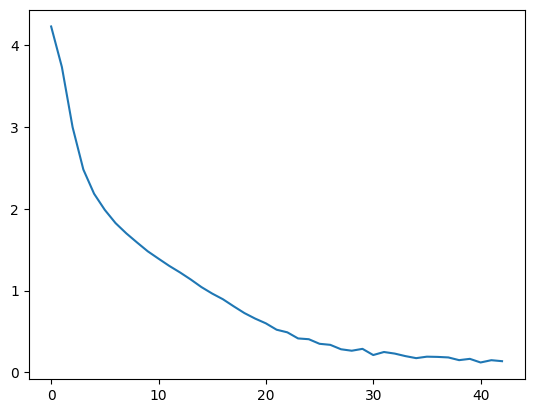

In [2]:
plt.plot([4.2326, 3.7369, 2.9993, 2.4818, 2.1854, 1.9872, 1.8258, 1.7005, 1.5889, 1.4807, 1.3908, 1.3024, 1.2225, 1.1362, 1.0428, 0.9636, 0.8941, 0.8078, 0.7250, 0.6574, 0.5991, 0.5212, 0.4890, 0.4144, 0.4048, 0.3487, 0.3360, 0.2818, 0.2639, 0.2869, 0.2111, 0.2483, 0.2290, 0.1980, 0.1731, 0.1912, 0.1883, 0.1818, 0.1486, 0.1645, 0.1201, 0.1481, 0.1360])